# Model Training

Summary of ML models and how to train them (How To Train A Model :P)

**Explanatory Variable**
What the variable we're measuring depends on

**Response Variable**
What we're measuring

**Confounding Variable**
Other key variables the response variable depends on, is tied to.
Or, another variable that is associated positively or negatively with the explanatory and response variables.

We can control for this variable by grouping by this variable and then studying the groups individually.
There can be an infinite number of confounding variables. That's why we can never be 100% certain of a claim of causation based on an observational study.

Observational studies cannopt prove causality. They;re great to draw conclusions about causal connections. To do this, we must control for the most likely confounding variables. Only then can we suggest that an observational study may suggest a causal relationship.

The observed association isn't always causation.
**Association does not imply causation.** There is another confounding variable(s) that causes the observed relationship.
The observed associations with the response variable should be attributed to the confounding variable, not the explanatory variable.
We need to control for the confounding variable(s) to avoid incorrectly believing that the response variable is associated with the explanatory varaible.
We want to demonstrate that our association of interest is significangt even after controlling for potential confounding variables.

Confoudning is a major threat to the validity of inferences made about statistical associations.

Was the explanatory variable manipulated (controlled by the researcher)

For most studies we can't control every variable so we're not able to determine if X causes Y, but we are able to determine if X is associated with Y.

----------------------------

Data can be:

**Experimental**
* Researchers controlled/manipulated the variable.
* Studies in which groups of observations are pre-selected or randomly assigned to the the values of the explanatory variable
    * e.g. The researchers asked you to do X at a threshold of Y to compare you to other individuals who were asked to not do X.
    * True Experimental Study
        * Only one variable is manipulated and all other variables are held constant
        * Control Group - There is a control group to which other values of the explanatory variable are compared to on the response variable
        * Random Assignment - Observations are randomly assigned to one group or another
        * Can't determine causality, only if the treatment variable is associated with the response variable.
    * Quasi Experimental Study
        * Treatment and control groups are pre-selected
            * (e.g. if we're testing the affect of cocaine of memory, we can't randomly assign some users to have cocaine as that would be unethical, therefore we select those who already test +ve for cocaine)
        * Only one variable is manipulated
        * Control Group - There is a control group
        * No Random Assignment
        * We can increase the rigor of a quasi-experimental design by:
            * Measuring as many confounding variables as possible
            * Having a control group
            * Using a pre and post-test design whenever possible.
        * A quasi-experimental design will not allow us to infer causality between an explanatory variable and our response variable.


**Observational**
* Data Reporting
* Sample Survey
* Observational Study
* The researchers simply reported the variable.


One of the first things we want to do is to check for any imbalances between your treatment and control groups on key variables that could change how the treatment affects the response variable.
If imbalances are identified, those variables can be included in the statsitical model to predict the response variable so that they can be statistically controlled.

**Statistical Control:** Include unbalanced covariates as additional explanatory variables in the analysis.

**Multivariate Methods**


In [3]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("white")
my_dpi=96
import warnings
warnings.filterwarnings('ignore')
# For Model Training
from sklearn.model_selection import train_test_split, KFold, cross_val_score, ShuffleSplit, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import make_scorer

# Training and Evaluating Models

## ML Summary

## Supervised Learning Summary

<img src="supervised_learning_flowchart.png">

<img src="ML-Summary.png">

## Evaluating Many ML Models Quickly

### Find the best models with GridSearch and CrossValidation

In [4]:
def not_yo_nanas_model(features=None, labels=None, model_type='regression'):
    '''
    Takes in a dataset, trains a plethora of models on it (performs GridSearch
        and Cross Validation to find optimal model), and returns the best performing model.
    Args:
        labels (Pandas series):      Labels to predict 
        features (Pandas dataframe): Features in dataset used to predict the labels
        model_type (str):            Accepts "regression" and "classification" as values.
                                        Models tried will change according to this param.
    Returns:
        model  (Model object): Model that achieved the highest accuracy
        params (Dict):         Dict of parameters for the optimal model
        score  (Float):        Accuracy of the optimal model
    '''
    
    predictions = []
    r2_scores = []
    models = []
    scores = []
    best_score = []
    params = []
    optimal_model = {'model':'','params':'default','score':''}
    # Type of cross validation to perform: options 'shuffle' or 'kfold'
    cv_type = 'shuffle'
    # turn GridSearch on or off
    grid_search = 0
    gs_bestscore = 0
    
    # Initialize em models and range of parameters to try out during GridSearch
    ## Models for Regression
    if(model_type == 'regression'):
        models.append(DecisionTreeRegressor())
        params.append({
                'criterion': ['mse', 'mae'],
                'min_samples_split': [10, 20, 40],
                'max_depth': [2, 6, 8],
                'min_samples_leaf': [20, 40, 100],
                'max_leaf_nodes': [5, 20, 100]})
        models.append(RandomForestRegressor())
        params.append({
                'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
                'max_features': ['auto', 'sqrt'],
                'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'bootstrap': [True, False]})
        models.append(AdaBoostRegressor())
        params.append({
                'n_estimators': [50, 100],
                'learning_rate' : [0.01,0.05,0.1,0.3,1],
                'loss' : ['linear', 'square', 'exponential']})
        models.append(LinearRegression())
        params.append({
                'penalty': ['l1','l2'],
                'dual': [True,False],
                'max_iter': [100,110,120,130,140],
                'C': [1.0,1.5,2.0,2.5]})
        model_names = ['Decision Trees','Random Forest','Adaptive Boosting','Linear Regression']
    ## Models for Classification
    elif(model_type == 'classification'):
        models.append(DecisionTreeClassifier())
        params.append({
                'criterion': ['gini', 'entropy'],
                'max_depth': [1,2,15,20,30,40,50],
                'max_features': ['sqrt','log2'],
                'min_samples_split': [2,5,10]})
        models.append(BaggingClassifier())
        params.append({
                'n_estimators': [40, 42],
                'base_estimator__max_leaf_nodes':[10, 15],
                'base_estimator__max_depth':[4, 5, 6]})
        models.append(AdaBoostClassifier())
        params.append({
                'algorithm': ['SAMME', 'SAMME.R'],
                'n_estimators': [1,10,100,1000]})
        models.append(GradientBoostingClassifier())
        params.append({
                'n_estimators': [1,10,100,1000],
                'learning_rate' : [0.001,0.01,0.05,0.1,0.5],
                'subsample' : [0.1,0.5,1.0],
                'max_depth': [1,3,5,10,20,50,100],
                'minsamplessplit': [3]})
        models.append(KNeighborsClassifier())
        params.append({
                'n_neighbors': [1, 3, 5, 10, 50, 100],
                'weights': ['uniform', 'distance'],
                'algorithm': ['auto','ball_tree','kd_tree'],
                'metric': ['euclidean', 'cityblock']})
        models.append(GaussianNB())
        params.append({})
        models.append(SGDClassifier())
        params.append({
                'loss': ['log'],
                'penalty': ['l2','l1','elasticnet']})
        models.append(LogisticRegression())
        params.append({
                'penalty': ['l1','l2'],
                'C': [0.00001,0.0001,0.001,0.01,0.1,1,10]})
        models.append(RandomForestClassifier())
        params.append({
                'n_estimators': [1,10,100,1000],
                'max_depth': [10, 15,20,30,40,50,60,70,100],
                'min_samples_split': [2,5,10],
                'max_features': ['auto', 'sqrt', 'log2']})
        models.append(SVC())
        params.append({
                'kernel':('linear', 'rbf'),
                'C':(1,0.25,0.5,0.75),
                'gamma': (1,2,3,'auto'),
                'decision_function_shape':('ovo','ovr'),
                'shrinking':(True,False)})
        model_names = ['GaussianNB','Decision Tree','Bagging', 'AdaBoost', 'Gradient Boosting', 'KNeighbors', 'Stochastic Gradient Descent', 'Logistic Regression', 'Random Forest', 'Support Vector']
    ## Models for Clustering
    elif(model_type == 'clustering'):
        # TODO - Implement clustering algos
        model_names = []
        
    # Train Test Split
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.1, random_state=42)

    # Fit em models to the training data and get predictions on test set
    for i in range(len(models)):
        # Cross Validation to get more juice out of our training data
        if(cv_type=='kfold'):
            # K-Fold Cross Validation
            cv_kfold = KFold(n_splits=10, shuffle=True, random_state=42)
        elif(cv_type=='shuffle'):
            # ShuffleSplit Cross Validation
            cv_shuffle = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 42)
        cv = cross_val_score(models[i], X_train, y_train, cv=cv_shuffle)
        
        # Cross Validation Scores
        scores.append(cv)
        print("%s: %f (%f)" % (model_names[i], cv.mean(), cv.std()))
        
        if(grid_search==0):
            # Fit the model
            models[i].fit(X_train, y_train)
            
            # Make predictions
            predictions.append(models[i].predict(X_test))
        else:
            # Compute the optimal model by finding best set of model params over training data
            grid = GridSearchCV(models[i], params[i], cv=cv_shuffle)
            
            # Fit the model
            grid = grid.fit(X_train, y_train)
            
            # Store highest scoring model in 'optimal_model'
            if(grid.best_score_>gs_bestscore):
                optimal_model['model'] = grid.best_estimator_
                optimal_model['params'] = grid.best_params_
                optimal_model['score'] = grid.best_score_
                gs_bestscore = grid.best_score_
                
                # Make predictions
                predictions.append(optimal_model['model'].predict(X_test))
    
    if(grid_search==0):
        # Find model with highest accuracy
        for i in range(len(scores)):
            best_score.append(scores[i].mean())
            # print(best_score)
        optimal_model['model'] = models[best_score.index(max(best_score))]
        optimal_model['score'] = max(best_score)
    

    # Plot performance of models during CV and GridSearch
    fig = plt.figure(figsize = [12, 12])
    plt.suptitle('Plot Model Performance')
    afig = fig.add_subplot(111)
    plt.boxplot(scores)
    afig.set_xticklabels(model_names)
    plt.xticks(rotation=60)
    plt.show()
    
    return optimal_model

Decision Trees: 0.736923 (0.063394)
Random Forest: 0.850214 (0.052040)
Adaptive Boosting: 0.829694 (0.059901)
Linear Regression: 0.747550 (0.049284)


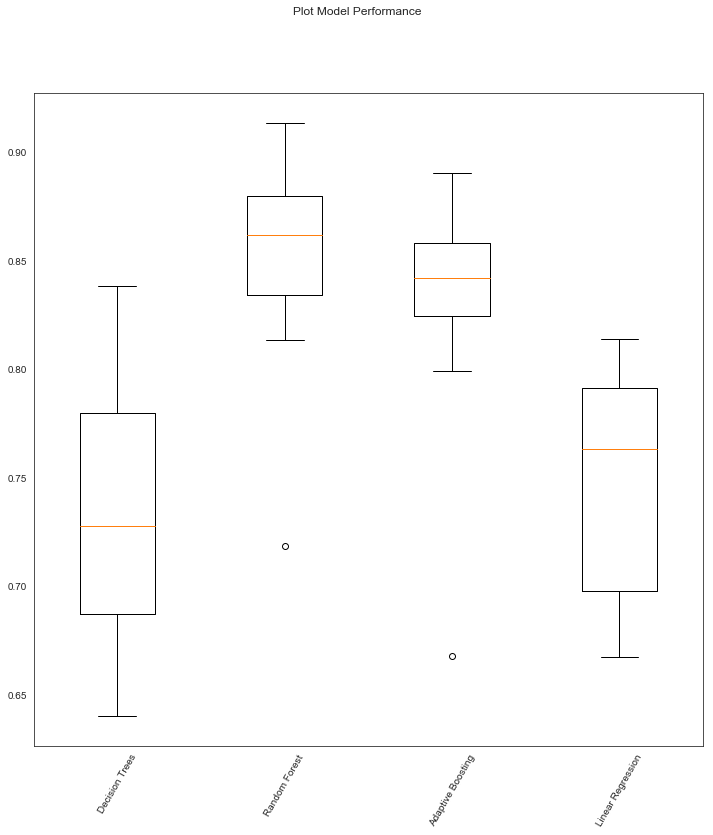

{'model': RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0, warm_start=False),
 'params': 'default',
 'score': 0.8502137038403571}

In [5]:
# Testing very_cool_predictions() with sample Regression dataset
from sklearn.datasets import load_boston
boston = load_boston()
y = boston.target
X = boston.data
model = not_yo_nanas_model(X,y,'regression')
model

GaussianNB: 0.915534 (0.017395)
Decision Tree: 0.943689 (0.016704)
Bagging: 0.954369 (0.020388)
AdaBoost: 0.947573 (0.016928)
Gradient Boosting: 0.926214 (0.012433)
KNeighbors: 0.934951 (0.016275)
Stochastic Gradient Descent: 0.856311 (0.075178)
Logistic Regression: 0.939806 (0.019802)
Random Forest: 0.945631 (0.012433)
Support Vector: 0.638835 (0.020732)


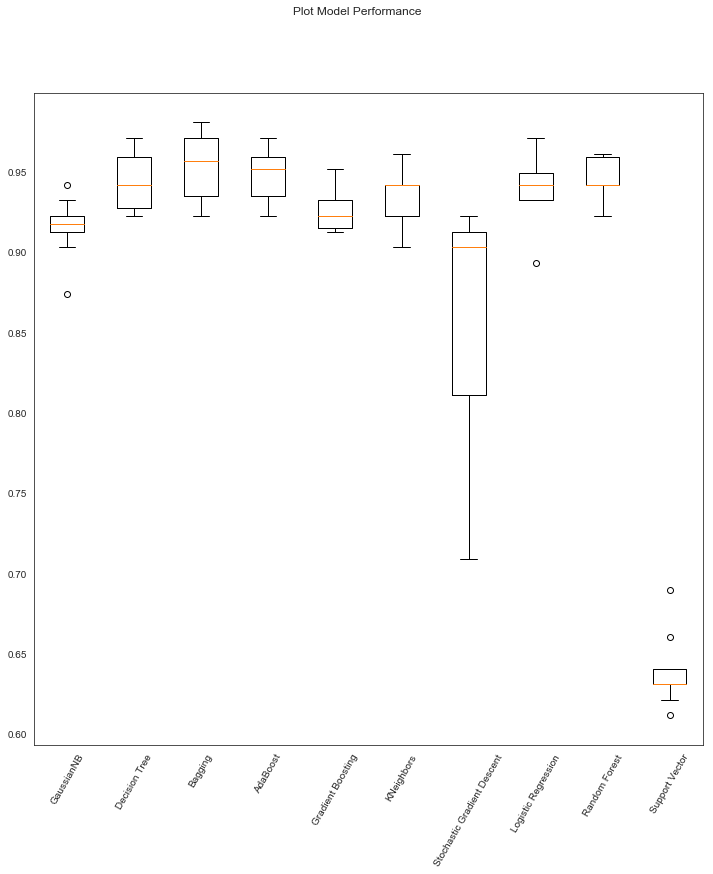

{'model': AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
           learning_rate=1.0, n_estimators=50, random_state=None),
 'params': 'default',
 'score': 0.9543689320388349}

In [6]:
# Testing very_cool_predictions() with sample Classification dataset
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()
y = bc.target
X = bc.data
model = not_yo_nanas_model(X,y,'classification')
model

## Exploring New Algorithms

Note on exploring new algorithms:
<img src="learning_an_ml_algorithm.png">
Evaluate includes getting the accuracy, explaining why it worked/didn't worked, and plotting the decision boundary.

# Naive Bayes

In [ ]:
# Initialize + Train
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
t0 = time()
# fit to learn the patterns given the training data
clf.fit(features_train, labels_train)
print "training time:", round(time()-t0, 3), "s"

In [ ]:
# Get Predictions
t1 = time()
# create a vector of predictions
pred = clf.predict(features_test)
print "prediction time:", round(time()-t1, 3), "s"

In [ ]:
# Measure Accuracy
accuracy = clf.score(features_test, labels_test)

## Pros and Cons

**Pros**
* Easy to implement. Great with big feature spaces (works great for text and English has 20,000-30,000 words)
	* One particular feature of Naive Bayes is that it’s a good algorithm for working with text classification. When dealing with text, it’s very common to treat each unique word as a feature, and since the typical person’s vocabulary is many thousands of words, this makes for a large number of features. The relative simplicity of the algorithm and the independent features assumption of Naive Bayes make it a strong performer for classifying texts.
* Simple and efficient to run.
	* Prediction time is orders of magnitude << Training time.
    
**Cons**
* Can break in funny ways. For e.g. can't combine phrases with 2 words

**Why is Naïve Bayes "naïve"**

Because it ignores the order of the features (or words), i.e. assumes independence between every pair of features. It only looks at all the features and their frequencies as a way to do classification. But it's good for many cases.

# SVM

In [ ]:
# Initialize + Train
from sklearn import svm
clf = svm.SVC()
t0 = time()
# fit to learn the patterns given the training data
clf.fit(features_train, labels_train)
print "training time:", round(time()-t0, 3), "s"

In [ ]:
# Get Predictions
t1 = time()
# create a vector of predictions
pred = clf.predict(features_test)
print "prediction time:", round(time()-t1, 3), "s"

In [ ]:
# Measure Accuracy
accuracy = clf.score(features_test, labels_test)

## Parameters

**Good C and Gamma ranges to try:**
* C_range = np.logspace(-3, 10, 13)
gamma_range = np.logspace(-9, 3, 14)
* {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-3, 2, 6)}

From http://stackoverflow.com/questions/26337403/what-is-a-good-range-of-values-for-the-svm-svc-hyperparameters-to-be-explored

**C** controls the tradeoff between smooth decision boundary and classifying points correctly. A large C = more training points classified correctly. Figuring out how much you want a smooth decision boundery vs something that classifies a lot of points correctly is part of the artistry of machine learning.

**Gamma** values determine how much the influence is spread out, i.e. how far the influence of each point reaches or how many points out of the total actually influence the decision boundary (or how many data points we use as support).
* Low Values: Far Reach
* High Values: Close Reach
* A high gamma means a small number of data points are used as supports, a low gamma means a lot of points qualify as being supports and thus influence our decision boundary.
* For high values of gamma, we can end up overfitting to the small number of supports, because each support carries a lot of weight.
* A lower gamma has a smoother, more linear decision boundary.

**kernel** type:
* The 'rbf' kernel is more sensitive to values of C, so a large value of C will be reflected more prominently in the decision boundary. 
* 'linear' kernels are going to give us a straight line. The 'gamma' parameter actually has no effect on the 'linear' kernel for SVMs. The key parameter for this kernel function is "C".

## 	Lessons from implementing in sklearn:

* SVM is MUCH slower to train and use for predicting than Naïve Bayes.
* One way to speed up an algorithm is to train it on a smaller training dataset. The tradeoff is that the accuracy almost always goes down when you do this.
    * features_train = features_train[:len(features_train)/100] 
labels_train = labels_train[:len(labels_train)/100] 
	* In my test, using only 1% of the features, still resulted in 88% performance (as compared to 0.984 with 100% of the data)? Not too shabby!
	* If speed is a major consideration (and for many real-time machine learning applications, it certainly is) then you may want to sacrifice a bit of accuracy if it means you can train/predict faster. For e.g. Voice recognition and transaction blocking need to happen in real time, with almost no delay.
* Changing the kernel of SVM to “rbf” resulted in lower accuracy (fell to 0.6), as the SVM is now overfitting.
* Increasing C increased the accuracy. The decision boundary gets more complex with an increase in C:
	* C = 10, acc = 0.616040955631
	* C = 100, acc = 0.616040955631
	* C = 1000, acc = 0.821387940842
	* C = 10000, acc = 0.892491467577
* Optimized C values for the rbf kernel on 1% of the test/training dataset. Now time to test on full training/test dataset.
* Accuracy with optimized C and using the rbf kernel = 0.990898748578
* Naive Bayes is great for text--it’s faster and generally gives better performance than an SVM for this particular problem. Of course, there are plenty of other problems where an SVM might work better. 
* Knowing which one to try when you’re tackling a problem for the first time is part of the art and science of machine learning. In addition to picking your algorithm, depending on which one you try, there are parameter tunes to worry about as well, and the possibility of overfitting (especially if you don’t have lots of training data). 
*" Our general suggestion is to try a few different algorithms for each problem. Tuning the parameters can be a lot of work, but just sit tight for now--toward the end of the class we will introduce you to GridCV, a great sklearn tool that can find an optimal parameter tune almost automatically.

## Pros and Cons

Goal: Pick the plane that is the most robust to classification errors.

**Pros:**

* Work really well in complicated domains where there is a clear marginal separation.
* Effective in high dimensional spaces.
* Still effective in cases where number of dimensions is greater than the number of samples.
* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
* Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

**Cons:**

* Don't perform as well in large datasets because the training time would be the cube of the size of the dataset.
* Also doesn't perform well in a dataset with lots of features. Tend to be slow in this case.
* Don't perform well with lots of noise, so when the classes are very overlapping, you have to count independent evidence. Tend to overfit in this case. Here a Naïve Bayes classifier would be better.
* If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
* SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

# KNN

# Regression

Regression answers:
* What's the best predictor of the relationship between our explanatory and response variables?
* Is the relationship b/w the response and explanatory variable real? Or, is there a confounding variable A or variable B that actually explains this relationship? -- Testing for presence of confounding variables

There could be many conclusions:
* Y (response var) could be caused by X (explanatory var). Or it could be caused by a confounding var Z. Or X and Z could independently cause Y after controlling for each other.

# Decision Trees

# Random Forests

# AdaBoost

# Lasso Regression

# K-means Cluster Analysis

# Cross Validation